In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from mapmanagercore import MapAnnotations, MultiImageLoader, MMapLoader
import matplotlib.pyplot as plt

In [5]:
# Create an image loader
loader = MultiImageLoader(
    lineSegments="../data/rr30a_s0u/line_segments.csv",
    points="../data/rr30a_s0u/points.csv")

# add image channels to the loader
loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch1.tif", channel=0)
loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch2.tif", channel=1)
loader.readMetadata("../data/rr30a_s0u/metadata.json")

# loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch1.tif", channel=0, time=1)
# loader.read("../data/rr30a_s0u/t0/rr30a_s0_ch2.tif", channel=1, time=1)
# loader.readMetadata("./data/rr30a_s0u/metadata.json")


# Create the annotation map
map = MapAnnotations(loader)
map.points[:]
map.segments[:]

# save the annotation map
map.save("../data/rr30a_s0u.mmap")
map.close()

/Users/cudmore/Sites/MapManagerCore/mapmanagercore/lazy_geo_pandas/schema.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, key] = df.loc[:, key].fillna(defaults[key])


In [6]:
map = MapAnnotations(MMapLoader("../data/rr30a_s0u.mmap"))


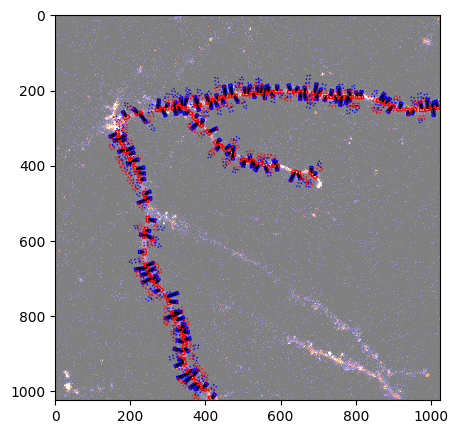

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))

map.points["anchorLine"].plot(color='black', ax=ax)
map.points["point"].plot(color='red', marker='o', markersize=2, ax=ax)

map.points["roiHead"].plot(edgecolor='blue', color=(0,0,0,0), ax=ax)
map.points["roiHeadBg"].plot(edgecolor='blue', linestyle='dotted', color=(0,0,0,0), ax=ax)

map.points["roiBase"].plot(edgecolor='red', color=(0,0,0,0), ax=ax)
map.points["roiBaseBg"].plot(edgecolor='red', linestyle='dotted', color=(0,0,0,0), ax=ax)

slices = map.getPixels(time=0, channel=0, zRange=(18, 36))
slices.plot(ax=ax, vmin=300, vmax=1500, alpha=0.5, cmap='CMRmap')

plt.show()

In [32]:
map.points[["roiStatsBg_ch1_max", "roiStatsBg_ch2_max", "roiStats_ch1_max", "roiStats_ch2_max"]]
# map.points[:]

,,segmentID,point,anchor,xBackgroundOffset,yBackgroundOffset,z,anchorZ,modified,roiExtend,roiRadius,...,roi,roiBg,roiStats_ch1_sum,roiStats_ch1_max,roiStats_ch2_sum,roiStats_ch2_max,roiStatsBg_ch1_sum,roiStatsBg_ch1_max,roiStatsBg_ch2_sum,roiStatsBg_ch2_max
spineID,t,,,,,,,,,,,,,,,,,,,,,
0,0,0,POINT (431 239),POINT (425 225.4),21.0,0.0,31,31,1970-01-01 00:00:00.000000,4.0,4.0,...,"POLYGON ((432 229, 432 228, 435 226, 430 220, ...","POLYGON ((453 229, 453 228, 456 226, 451 220, ...",47011.0,649.0,73400.0,1255.0,47765.0,1001.0,80572.0,1305.0
1,0,0,POINT (382 250),POINT (378 236),21.0,14.0,31,31,2024-05-13 16:07:35.062754,4.0,4.0,...,"POLYGON ((370 232, 370 240, 375 240, 379 255, ...","POLYGON ((391 246, 391 254, 396 254, 400 269, ...",13277.0,420.0,8074.0,193.0,12837.0,429.0,5978.0,255.0
2,0,0,POINT (416 245),POINT (414 228),21.0,14.0,31,31,1970-01-01 00:00:00.000000,4.0,4.0,...,"POLYGON ((421 230, 421 222, 416 222, 415 222, ...","POLYGON ((442 244, 442 236, 437 236, 436 236, ...",39888.0,1096.0,39644.0,800.0,18031.0,388.0,11555.0,303.0
3,0,0,POINT (447 231),POINT (444 218.1),21.0,21.0,31,31,1970-01-01 00:00:00.000000,4.0,4.0,...,"POLYGON ((451 213, 437 215, 436 215, 436 216, ...","MULTIPOLYGON (((472 234, 458 236, 457 236, 457...",38013.0,895.0,60227.0,929.0,22440.0,722.0,36251.0,1019.0
4,0,0,POINT (486 229),POINT (477 213),21.0,14.0,31,31,1970-01-01 00:00:00.000000,4.0,4.0,...,"POLYGON ((484 209, 481 209, 469 209, 469 217, ...","POLYGON ((505 223, 502 223, 490 223, 490 231, ...",16341.0,379.0,12050.0,268.0,58446.0,1390.0,73561.0,1180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0,0,POINT (1 2),POINT (354 240),332.1,-223.2,3,31,2024-05-13 16:44:20.705737,4.0,4.0,...,"POLYGON ((361 244, 361 243, 362 243, 364 241, ...","POLYGON ((693.1 20.8, 693.1 19.8, 694.1 19.8, ...",388998.0,1562.0,284486.0,690.0,7846.0,491.0,4929.0,237.0
142,0,0,POINT (1 2),POINT (354 240),332.1,-223.2,3,31,2024-05-13 16:44:31.104774,4.0,4.0,...,"POLYGON ((361 244, 361 243, 362 243, 364 241, ...","POLYGON ((693.1 20.8, 693.1 19.8, 694.1 19.8, ...",388998.0,1562.0,284486.0,690.0,7846.0,491.0,4929.0,237.0
143,0,0,POINT (1 2),POINT (354 240),332.1,-223.2,3,31,2024-05-13 16:45:05.670796,4.0,4.0,...,"POLYGON ((361 244, 361 243, 362 243, 364 241, ...","POLYGON ((693.1 20.8, 693.1 19.8, 694.1 19.8, ...",388998.0,1562.0,284486.0,690.0,7846.0,491.0,4929.0,237.0


In [38]:
timePoint = map.getTimePoint(0)
id = timePoint.addSpine(segmentId=0, x=1,y=2,z=3)
# timePoint.moveAnchor(spineId=id, x=1, y=1, z=3)
# timePoint.moveSpine(spineId=id, x=1, y=1, z=3)
# timePoint.deleteSpine(id)
# timePoint.undo()
# timePoint.redo()
# timePoint.updateSpine(spineId=id, value={
#   "f": 1,
# })
# timePoint.undo()
# timePoint.translateBackgroundRoi()
# timePoint.deleteSegment("")
id

# abb
timePoint.points["roi"].get_coordinates()
timePoint.points["roiBase"].get_coordinates()['x']


   INFO - base.py fetchSlices() line:110 -- BINGO !!!


/Users/cudmore/opt/miniconda3/envs/mmc-env/lib/python3.11/site-packages/geopandas/geodataframe.py:2469: FutureWarning: The `drop` keyword argument is deprecated and in future the only supported behaviour will match drop=False. To silence this warning and adopt the future behaviour, stop providing `drop` as a keyword to `set_geometry`. To replicate the `drop=True` behaviour you should update your code to
`geo_col_name = gdf.active_geometry_name; gdf.set_geometry(new_geo_col).drop(columns=geo_col_name).rename_geometry(geo_col_name)`.
  return gf.set_geometry(col, drop=drop, inplace=False, crs=crs)


,x,y
spineID,,
0,431.0,229.0
0,432.0,229.0
0,432.0,228.0
0,435.0,226.0
0,430.0,220.0
...,...,...
147,357.0,236.0
147,354.0,236.0
147,354.0,244.0


In [11]:
from mapmanagercore.schemas.spine import Spine


map.updateSpine(spineId=1, value=Spine(
  note="This is a note",
))
map.points[(1, ), ["note"]]

,,note
spineID,t,
1,0,This is a note


In [12]:
timePoint.points[1, "note"]

'This is a note'

In [36]:
map.segments["segment"].get_coordinates(include_z=True)
# map.segments["left"]

x      y       z
segmentID t                      
0         0  354.0  240.0  31.000
          0  359.0  240.0  31.000
          0  363.0  236.0  31.000
          0  391.0  236.0  31.000
          0  395.0  232.0  31.000
...            ...    ...     ...
4         0  241.0  479.0  28.222
          0  242.0  487.0  28.111
          0  245.0  492.0  28.000
          0  245.0  503.0  27.889
          0  247.0  508.0  27.667

[221 rows x 3 columns]

In [35]:
map.points["roi"].get_coordinates()
map.points['anchorLine']

spineID  t
0        0    LINESTRING (425 225.4, 431 239)
1        0      LINESTRING (378 236, 382 250)
2        0      LINESTRING (414 228, 416 245)
3        0    LINESTRING (444 218.1, 447 231)
4        0      LINESTRING (477 213, 486 229)
                           ...               
141      0          LINESTRING (354 240, 1 2)
142      0          LINESTRING (354 240, 1 2)
143      0          LINESTRING (354 240, 1 2)
144      0          LINESTRING (354 240, 1 2)
145      0          LINESTRING (354 240, 1 2)
Name: anchorLine, Length: 146, dtype: geometry

In [15]:
map.points["roiBase"].get_coordinates()

x      y
spineID t              
0       0  431.0  229.0
        0  432.0  229.0
        0  432.0  228.0
        0  435.0  226.0
        0  430.0  220.0
...          ...    ...
139     0  357.0  236.0
        0  354.0  236.0
        0  354.0  244.0
        0  359.0  244.0
        0  360.0  244.0

[1689 rows x 2 columns]

In [16]:
slices = map.getPixels(time=0, channel=0, zRange=(18, 36))

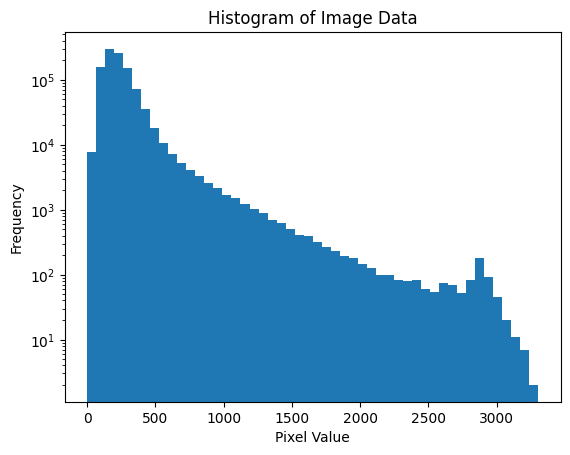

In [17]:
plt.hist(slices.data(), bins=50)
plt.yscale('log')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Image Data')
plt.show()

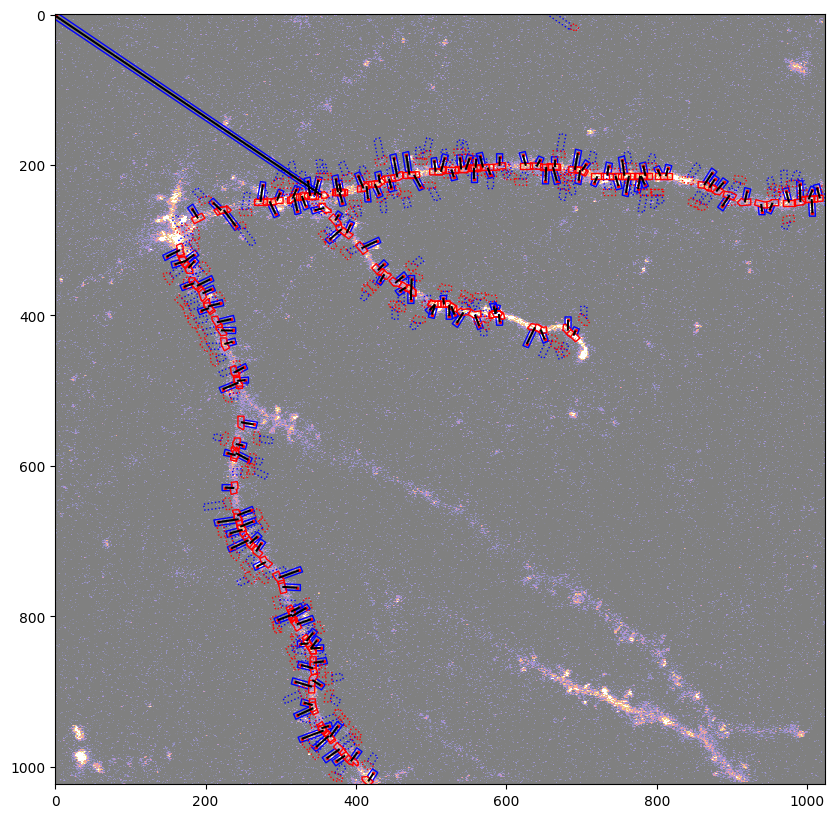

In [18]:

fig, ax = plt.subplots(figsize=(10, 10))

map.points["anchorLine"].plot(color='black', ax=ax)
map.points["point"].plot(color='red', marker='o', markersize=2, ax=ax)

map.points["roiHead"].plot(edgecolor='blue', color=(0,0,0,0), ax=ax)
map.points["roiHeadBg"].plot(edgecolor='blue', linestyle='dotted', color=(0,0,0,0), ax=ax)

map.points["roiBase"].plot(edgecolor='red', color=(0,0,0,0), ax=ax)
map.points["roiBaseBg"].plot(edgecolor='red', linestyle='dotted', color=(0,0,0,0), ax=ax)

slices.plot(ax=ax, vmin=300, vmax=1500, alpha=0.5, cmap='CMRmap')

plt.show()

In [19]:
map.points["z"].between(10, 40)

spineID  t
0        0     True
1        0     True
2        0     True
3        0     True
4        0     True
              ...  
135      0     True
136      0     True
137      0     True
138      0     True
139      0    False
Name: z, Length: 140, dtype: boolean

In [20]:
filtered = map.filterPoints(map.points["z"].between(10, 40))

In [21]:
filtered.points[:, "z"]

spineID  t
0        0    31
1        0    31
2        0    31
3        0    31
4        0    31
              ..
134      0    29
135      0    29
136      0    28
137      0    29
138      0    31
Name: z, Length: 139, dtype: Int64

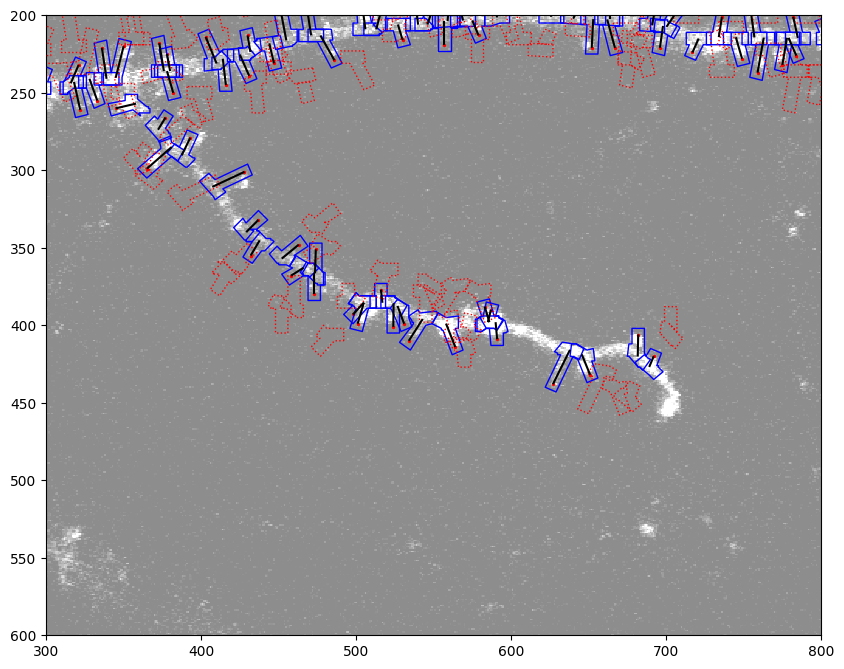

In [22]:
slices = filtered.getPixels(time=0, channel=0)

fig, ax = plt.subplots(figsize=(10, 10))

filtered.points["anchorLine"].plot(color='black', ax=ax)
filtered.points["point"].plot(color='red', marker='o', markersize=2, ax=ax)

filtered.points["roi"].plot(edgecolor='blue', color=(0,0,0,0), ax=ax)
filtered.points["roiBg"].plot(edgecolor='red', linestyle='dotted', color=(0,0,0,0), ax=ax)

slices.plot(ax=ax, vmin=300, vmax=1500, alpha=0.45, cmap='gray')

# Set x and y limits
ax.set_xlim(300, 800)
ax.set_ylim(600, 200)

plt.show()

In [23]:
layers = map.getTimePoint(0).getAnnotations(options={
    "zRange": (18, 36),
    "annotationSelections": {
      "segmentIDEditing": 1,
      "segmentID": 1,
      "spineID": 1
    },
    "showLineSegments": True,
    "showAnchors": True,
    "showLabels": True,
    "showLineSegmentsRadius": True,
    "showSpines": True,
  },
)

for layer in layers:
    coords, props = layer.coordinates()
    print("Properties:", props, "\n coords:", coords.head(2), "\n\n")

Properties: {'id': 'segment-ghost-left-ghost', 'select': 'segmentID', 'edit': 'segmentIDEditing', 'stroke': <function AnnotationsLayers._getSegments.<locals>.getStrokeColor at 0x139231580>, 'opacity': 127.5, 'strokeWidth': 0.5, 'offset': <function AnnotationsLayers._segmentGhost.<locals>.<lambda> at 0x1392096c0>} 
 coords:                     x           y
segmentID                        
1          358.656854  240.343146
1          360.656854  242.343146 


Properties: {'id': 'segment-ghost-right-ghost', 'select': 'segmentID', 'edit': 'segmentIDEditing', 'stroke': <function AnnotationsLayers._getSegments.<locals>.getStrokeColor at 0x139231580>, 'opacity': 127.5, 'strokeWidth': 0.5, 'offset': <function AnnotationsLayers._getSegments.<locals>.offset at 0x138e567a0>} 
 coords:                x          y
segmentID                  
1          347.0  251.23873
1          347.0  256.00000 


Properties: {'id': 'segment-ghost-left-ghost-interaction', 'select': 'segmentID', 'edit': 'segment